# Plotting GPU runtimes from cached detection

In [19]:
import jsonlines
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

### Extracting data from jsonls inside cached_waymo_train_0001_detection_v100 as a representative sample

In [17]:
runtimes = {}
for p in Path("../scripts/cached_waymo_train_0001_detection_v100").glob("*.jsonl"):
    with jsonlines.open(p) as reader:
        data = list(reader)
    model = data[0]["model_names"][0]
    data = data[1:]
    if model not in runtimes:
        runtimes[model] = [x["runtime"] for x in data]
    else:
        runtimes[model].extend([x["runtime"] for x in data])

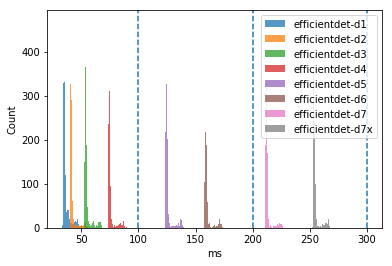

In [34]:
for x in [100, 200, 300]:
    plt.axvline(x=x, linestyle="--")
plt.xlabel("ms")
cmap = plt.get_cmap("tab10")
for i, (d, v) in enumerate(sorted(runtimes.items(), key=lambda x: x[0])):
    sns.histplot(v, label=d, color=cmap(i), linewidth=0)
plt.legend()